In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

一元线性回归:$y=a x+b$，a,b为未知参数

In [2]:
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [3]:
# 测试数据集
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


In [4]:
# Linear regression model
model = nn.Linear(input_size, output_size)


In [5]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


In [6]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # 前向传播 
    outputs = model(inputs)# 前向传播求出预测的值
    loss = criterion(outputs, targets)#目标函数，均方误差
    
    # 反向传播 与 优化器 
    optimizer.zero_grad()# 梯度初始化为零
    loss.backward()# 反向传播求梯度
    optimizer.step()# 更新所有参数
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


Epoch [5/60], Loss: 4.7446
Epoch [10/60], Loss: 2.0550
Epoch [15/60], Loss: 0.9653
Epoch [20/60], Loss: 0.5237
Epoch [25/60], Loss: 0.3448
Epoch [30/60], Loss: 0.2722
Epoch [35/60], Loss: 0.2427
Epoch [40/60], Loss: 0.2307
Epoch [45/60], Loss: 0.2257
Epoch [50/60], Loss: 0.2236
Epoch [55/60], Loss: 0.2227
Epoch [60/60], Loss: 0.2222


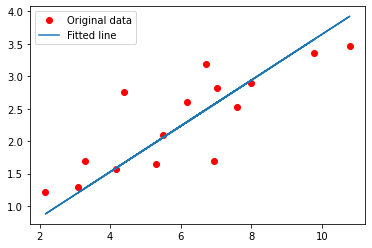

In [10]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')